In [80]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [81]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

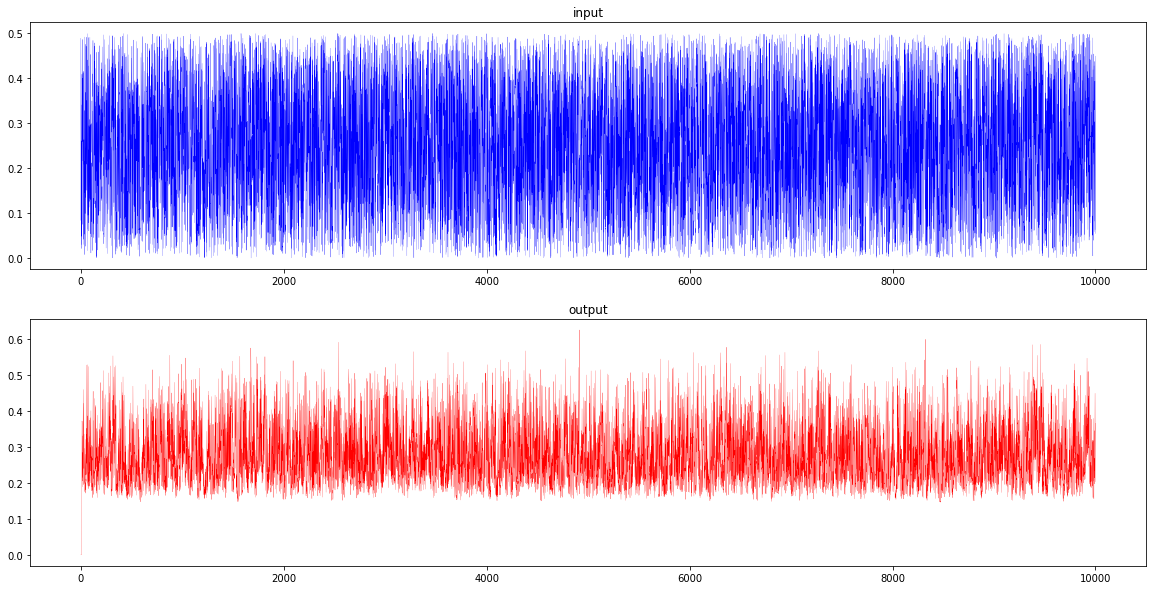

In [82]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000] #validation
x_test = x[5000:]

y_train = y[:4000]
y_valid = y[4000:5000]
y_test = y[5000:]

## TDNN

In [83]:
# Create a TDNN model
def create_tdnn(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=10, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=10, activation='relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(input_shape, activation='sigmoid'))
    learning_rate = 0.1
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [84]:
X = np.reshape(x, (1,len(x),1))
Y = np.reshape(y, (1,len(y),1))


X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

input_shape = X_train.shape[1:]
model = create_tdnn(input_shape)


model.summary()


(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 3991, 32)          352       
                                                                 
 conv1d_23 (Conv1D)          (None, 3982, 64)          20544     
                                                                 
 flatten_9 (Flatten)         (None, 254848)            0         
                                                                 
 dense_16 (Dense)            (None, 32)                8155168   
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8,176,130
Trainable params: 8,176,130
Non-trainable params: 0
_________________________________________________________

In [85]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2).history

Epoch 1/100


ValueError: in user code:

    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/lorenzo/.local/lib/python3.8/site-packages/keras/losses.py", line 1470, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 2 and 4000 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_13/dense_17/Sigmoid, mean_squared_error/remove_squeezable_dimensions/Squeeze)' with input shapes: [1,2], [1,4000].


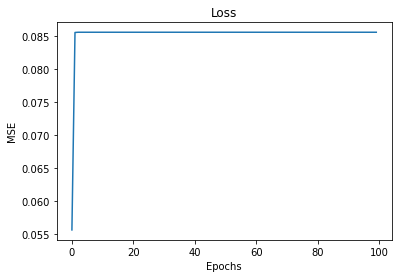

In [ ]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 27ms/step
[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.26350846]
  [0.20216753]
  [0.36535148]]]


ValueError: x and y must have same first dimension, but have shapes (4000,) and (1, 1)

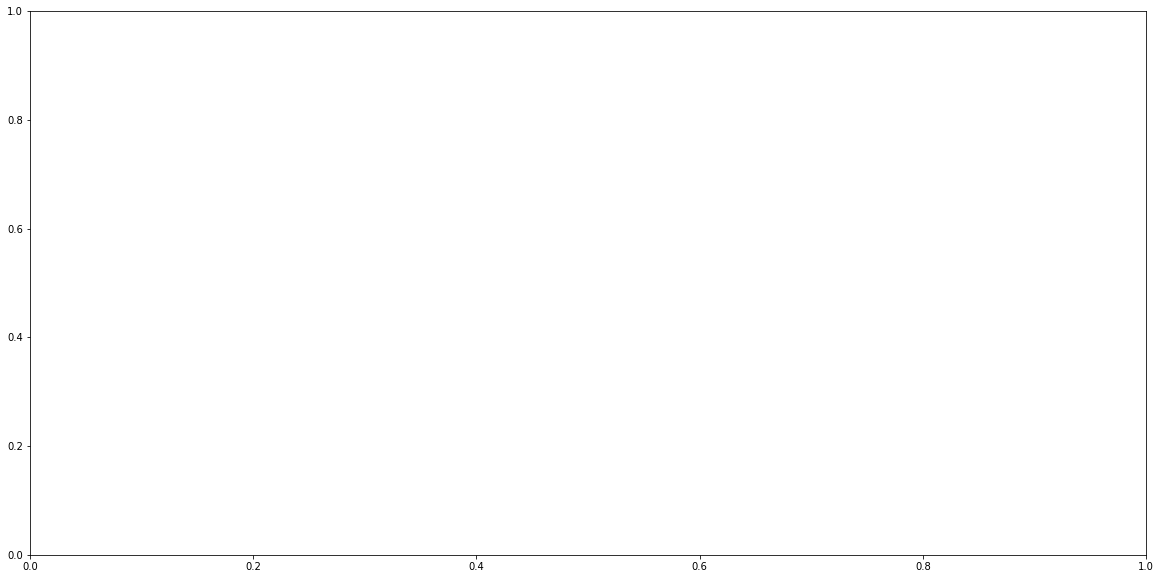

In [ ]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y, color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)


y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y, color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)
